# 13wk-1: Plotly – `pio`, `go` 를 활용한 시각화

최규빈  
2023-11-27

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/13wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-zQL5qH6iFWWd7EDmVE9eTm&si=CcNvj-WpJBID8tsM>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#---#
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# 3. Intro

## A. 궁금해

12wk-2 강의노트중..

In [3]:
df_sample = pd.DataFrame(
    {'path':['A','A','B','B','B'],
     'lon':[-73.986420,-73.995300,-73.975922,-73.988922,-73.962654],
     'lat':[40.756569,40.740059,40.754192,40.762859,40.772449]}
)
fig = px.line_mapbox(
    data_frame=df_sample,
    lat = 'lat',
    lon = 'lon',
    color = 'path',
    line_group = 'path',
    #---#
    mapbox_style = 'carto-positron',
    zoom=12,
    width = 750,
    height = 600    
)
scatter_data = px.scatter_mapbox(
    data_frame=df_sample,
    lat = 'lat',
    lon = 'lon',
    color = 'path',
    #---#
    mapbox_style = 'carto-positron',
    zoom=12,
    width = 750,
    height = 600    
).data 
fig.add_trace(scatter_data[0])
fig.add_trace(scatter_data[1])
fig.show(config={'scrollZoom':False})

도데체 저런코드는 어떻게 알아내는 걸까?

## B. 심슨의 역설 데이터

`-` 아래의 자료를 관찰하자.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).reset_index().melt(id_vars='index').set_axis(['department','gender','result','count'],axis=1)
df.head()

## C. `plotly`의 시각화구조

`-` 아래와 같은 방법이 가능하다.

-   pandas backend
-   `px`, 즉 `plotly.express`를 이용한 시각화
-   `go`, 즉 `plotly.graph_objects`를 이용한 시각화
-   `pio`, 즉 `plotly.io`를 이용한 시각화

`-` 예시1: pandas backend

In [5]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender',
    y='rate',
    color='gender',
    #---#
    title = '버클리대학교 성별합격률',
    width = 600
)

`-` 예시2: `px.bar`를 이용한 plot

In [6]:
tidydata = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()
#---#
px.bar(
    tidydata,
    x='gender',
    y='rate',
    color='gender',
    #---#
    title = '버클리대학교 성별합격률',
    width = 600
)

`-` 예시3: `px.bar`를 이용한 플랏 (pandas Series를 입력) – 결과가 조금
다름

In [7]:
tidydata = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()
#---#
px.bar(
    x=tidydata.gender,
    y=tidydata.rate,
    color=tidydata.gender,
    #---#
    title = '버클리대학교 성별합격률',
    width = 600
)

-   x축,y축,legend의 제목이 살짝 달라지긴 했음..

`-` 예시4: `px.bar`를 이용한 플랏 (list를 입력) – 결과가 조금 다름

In [8]:
px.bar(
    x=['female', 'male'],
    y=[0.42, 0.52],
    color=['female', 'male'],
    #---#
    title = '버클리대학교 성별합격률',
    width = 600
)

`# 예시5`: `go`를 이용한 시각화 – 색깔시각화가 불가능

`-` ggplot() + geom_col() 의 느낌으로!

In [9]:
fig = go.Figure()
bar = go.Bar(
    x=['female', 'male'],
    y=[0.42, 0.52]
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar).update_layout(layout)

-   색을 어떻게 구분하냐?

`#`

`# 예시6`: `go`를 이용한 시각화 – matplotlib의 겹쳐그리기 감성으로
색깔시각화 ($\star$)

`(예비학습)` – 이런느낌이 있었지

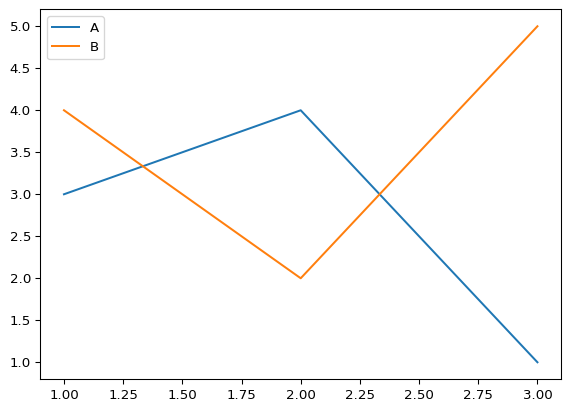

In [10]:
plt.plot([1,2,3],[3,4,1],label='A')
plt.plot([1,2,3],[4,2,5],label='B')
plt.legend()

이걸 응용하면

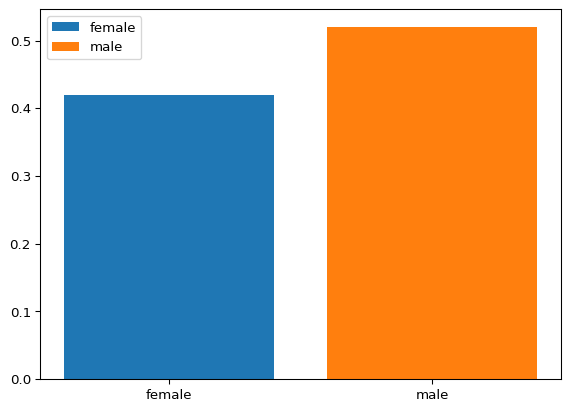

In [11]:
plt.bar(['female'],[0.42],label='female')
plt.bar(['male'],[0.52],label='male')
plt.legend()

예비학습에서 힌트를 얻으면!

In [12]:
fig = go.Figure()
bar_female = go.Bar(
    x=['female'],
    y=[0.42]
)
bar_male = go.Bar(
    x=['male'],
    y=[0.52]
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`# 예시7`: `go`를 이용한 시각화 – 색상의 변경

-   여자는 빨강, 남자는 파랑으로?

In [13]:
fig = go.Figure()
bar_female = go.Bar(
    x=['female'],
    y=[0.42],
    marker= {'color':'red'}
)
bar_male = go.Bar(
    x=['male'],
    y=[0.52],
    marker= {'color':'blue'}    
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`#`

`# 예시8`: `go`를 이용한 시각화 – 색상재설정 + x축, y축, legend의
title의 설정 + hover 설정

-   색상설정: `#EF553B`,`#636efa`
-   hovertemplate: `'gender=%{x}<br>rate=%{text}<extra></extra>'`

In [14]:
fig = go.Figure()
bar_female = go.Bar(
    x=['female'],
    y=[0.42],
    marker= {'color':'#EF553B'},
    text =[0.42],
    hovertemplate='gender=%{x}<br>rate=%{text}<extra></extra>',
    name='female'
)
bar_male = go.Bar(
    x=['male'],
    y=[0.52],
    marker= {'color':'#636efa'},
    text= [0.52],
    hovertemplate='gender=%{x}<br>rate=%{text}<extra></extra>',
    name='male'
)
layout = {
    'title':'버클리대학교의 남녀합격률',
    'width':600,
    'xaxis':{'title':'gender'},
    'yaxis':{'title':'rate'}, 
    'legend':{'title':'gender'},     
}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

`#`

***궁금: `#EF553B` 이런거 어떻게 알았어?…***

In [15]:
_fig = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender',
    y='rate',
    color='gender',
    #---#
    title = '버클리대학교 성별합격률',
    width = 600
)

In [16]:
_fig.data

In [17]:
_fig.layout

## D. `px` vs `go`

`-` `go`는 핸드메이드 제품을 `px`는 양산품을 만든다고 이해하면 편리하다.

-   `go`의 특징: 유저의 자유도가 매우 높음 (내가 직접 하는 느낌). 이는
    그림의 크기, 색상 등을 선호에 맞게 조정하기 유리. 생산성이 낮음.
-   `px`의 특징: 유저의 자유도가 낮음 (알아서 해주는 느낌). 원하는
    그림을 빠르게 생산할 수 있음. 다만 내가 원하는 디자인이 나오지 않을
    수 있음.

`-` 뭘 써야 할까?

-   `px`를 쓰는게 좋다.
-   그런데 `go`를 이용하여 그림이 그려지는 원리를 이해하면 이후에 `px`를
    이용한 그림을 수정하기 용이하다.
-   전략: `px`로 그림을 그린다. + `go`로 수정한다.

# 4. `pio`를 이용한 시각화

## A. 함수의 입력 (예비학습)

`예제1` – 두 벡터 x,y가 주어졌을때 `R`에서 cbind와 같은 역할을 하는
함수를 구현하라.

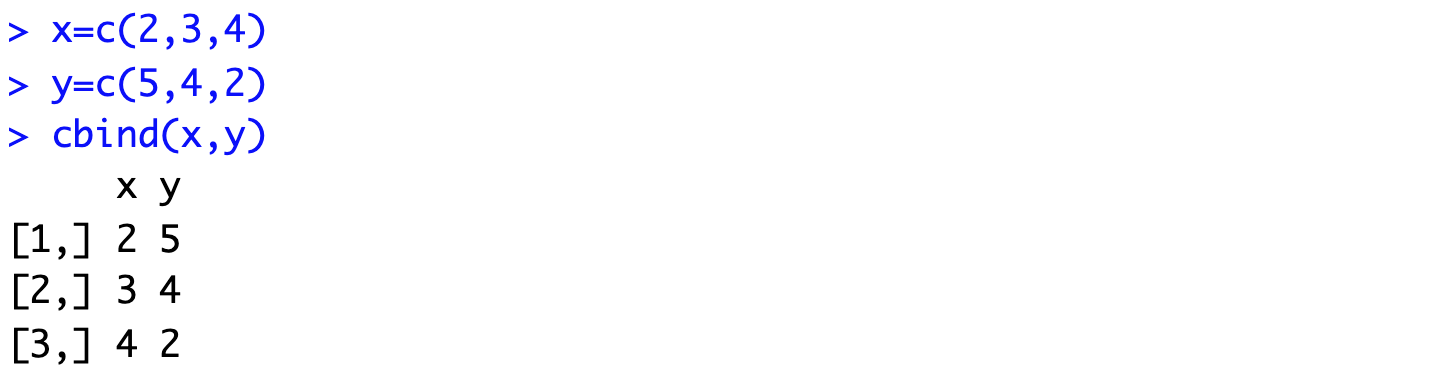

In [18]:
def cbind(x,y):
    rslt = np.stack([x,y],axis=1)
    return rslt 

In [19]:
cbind([2,3,4],[5,4,2])

`#`

`예제2` – 세개이상의 벡터가 온다면?

`-` args를 이용하여 이후 입력을 받음

In [20]:
def _cbind(x,y,*args):
    print(args)
    rslt = np.stack([x,y],axis=1)
    return rslt 

In [21]:
_cbind([1,1,1],[2,2,2],[3,3,3],[4,4,4])

([3, 3, 3], [4, 4, 4])

-   args는 함수내부에서 “튜플”로 취급된다!!

`-` args를 이용한 수정

In [22]:
def cbind(x,y,*args):
    rslt = np.stack([x,y]+list(args),axis=1)
    return rslt 

In [23]:
cbind([1,1,1],[2,2,2],[3,3,3],[4,4,4])

`#`

`# 예제3` – 기본적으로는 cbind의 동작을 하지만 경우에 따라서 rbind처럼
동작하길 원한다면?

`-` `axis`라는 변수를 따로 생성하여 입력으로 처리, 기본값은 1

In [24]:
def bind(x,y,*args,axis=1):
    rslt = np.stack([x,y]+list(args),axis=axis)
    return rslt 

In [25]:
bind([1,1,1],[2,2,2],[3,3,3],axis=1)

`#`

`# 예제4` – 여러가지 추가옵션을 사용하여 print를 통제하고 싶다면?

In [26]:
def _bind(x,y,*args,axis=1,**kwargs):
    print(kwargs)
    rslt = np.stack([x,y]+list(args),axis=axis)
    return rslt 

In [27]:
_bind([1,1,1],[2,2,2],[3,3,3],axis=1)

{}

In [28]:
_bind([1,1,1],[2,2,2],[3,3,3],axis=1,vb1=True,vb2=True,vb3=False,vb4=False)

{'vb1': True, 'vb2': True, 'vb3': False, 'vb4': False}

In [29]:
def bind(x,y, *args, axis=1, **kwargs):
    if ('vb1' in kwargs) and (kwargs['vb1'] == True):
        print(f'위치인자: {x,y}')
    if ('vb2' in kwargs) and (kwargs['vb2'] == True): 
        print(f'가변위치인자: {args}')
    if ('vb3' in kwargs) and (kwargs['vb3'] == True): 
        print(f'키워드인자: {axis}')
    if ('vb4' in kwargs) and (kwargs['vb4'] == True): 
        print(f'가변키워드인자: {kwargs}')   
    rslt = np.stack([x,y]+list(args),axis=axis)
    return rslt 

In [30]:
bind(
    [1,1,1],[2,2,2],
    [3,3,3],
    axis=0,
    vb1=True,vb2=True,vb3=True,vb4=True
) 

위치인자: ([1, 1, 1], [2, 2, 2])
가변위치인자: ([3, 3, 3],)
키워드인자: 0
가변키워드인자: {'vb1': True, 'vb2': True, 'vb3': True, 'vb4': True}

`#`

`# 예제5` – 위치인자를 키워드인자보다 뒤에 넣을 경우?

In [31]:
bind(axis=0,[1,2,3],[2,3,4])

In [32]:
bind([1,2,3],[2,3,4],axis=0)

In [33]:
bind([1,2,3],[2,3,4],axis=0,[3,4,5])

`#`

`# 예제6` – 가변키워드인자가 존재할 때, 키워드인자의 키를 잘못 입력할
경우?

In [34]:
bind([1,2,3],[2,3,4],ax=0,vb1=True,vb2=True,vb3=True,vb4=True)

위치인자: ([1, 2, 3], [2, 3, 4])
가변위치인자: ()
키워드인자: 1
가변키워드인자: {'ax': 0, 'vb1': True, 'vb2': True, 'vb3': True, 'vb4': True}

In [35]:
bind([1,2,3],[2,3,4], verbose = True)

-   아무일없음

In [36]:
bind([1,2,3],[2,3,4],axis=3)

-   이건 문제가 있음

`-` 요약

-   함수의 입력은 꽤 복잡한 방식으로 동작한다.
-   위치인자의 위치를 잘못 넣으면 동작하지 않는다.
-   가변키워드 인자가 존재할 때, 키워드인자의 키를 다른이름으로 넣으면
    에러가 발생하지 않는다. (그냥 무시)

`#`

`# 예제7` – 은근히 짜증났던 `plt.plot()`

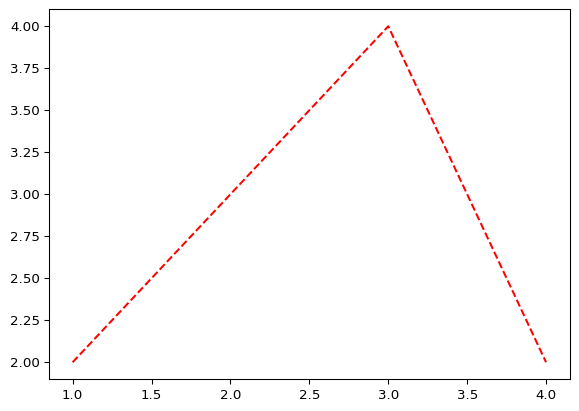

In [37]:
plt.plot([1,2,3,4],[2,3,4,2],'r--')

In [38]:
plt.plot([1,2,3,4],[2,3,4,2],color='lime','--')

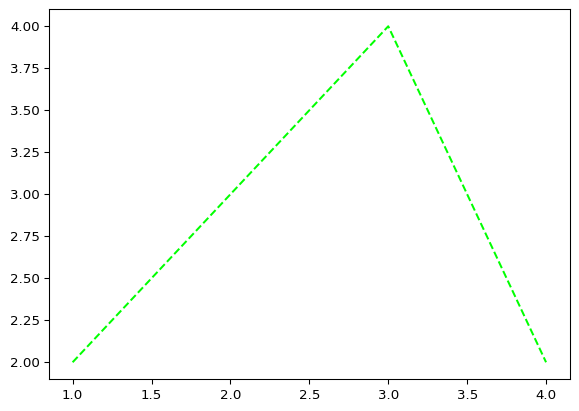

In [39]:
plt.plot([1,2,3,4],[2,3,4,2],'--',color='lime')

`#`

## B. dictionary + `pio.show()`

`# 예제1` – dictionary + `pio.show()`

In [40]:
fig = dict()
fig['data'] = [
    {'type':'bar','x':['female'],'y':[0.42]},
    {'type':'bar','x':['male'],'y':[0.52]},
]
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

기묘하다.. 마치 `pio.show()`에 필요한 kwargs를 fig라는 이름의 dict로
전달하는 느낌임!!

**요약: fig는 dictionary와 본질이 비슷하고, 이는 pio.show()에 전달할
kwargs를 모아놓은 집합이다.**

`#`

`# 예제2` – `female`의 rate를 0.62로 수정

`-` 아래의 그림을 그렸음.

In [41]:
fig = dict()
fig['data'] = [
    {'type':'bar','x':['female'],'y':[0.42]},
    {'type':'bar','x':['male'],'y':[0.52]},
]
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

`-` female의 rate을 0.42에서 0.62로 바꾸고 싶음.

In [42]:
fig['data'][0]['y'] = [0.62]
fig

In [43]:
pio.show(fig)

`#`

`# 예제3` – `fig`에 정리된 arg들이 전부는 아님

`-` 아래의 그림을 다시 관찰하자.

In [44]:
fig = dict()
fig['data'] = [
    {'type':'bar','x':['female'],'y':[0.42]},
    {'type':'bar','x':['male'],'y':[0.52]},
]
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

`-` 아래의 코드는 위와 같은 결과를 준다.

In [45]:
fig = dict()
fig['data'] = [
    {'type':'bar','x':['female'],'y':[0.42],'marker':{'color':'#636efa'}},
    {'type':'bar','x':['male'],'y':[0.52]},
]
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

`-` `fig`에 아무것도 정의하지 않아도 함수는 동작함

In [46]:
pio.show(fig=dict())

-   내부적으로 어떠한 값이 저장되어 있는 것임

`#`

# 5. `go`를 이용한 시각화

## A. `pio`와 `go`의 연결

In [47]:
fig = dict()
fig['data'] = [
    {'type':'bar','x':['female'],'y':[0.42]},
    {'type':'bar','x':['male'],'y':[0.52]},
]
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

위의 코드와 동일한 효과를 주는 코드를 알아보자.

`# 예제1` – data의 원소를 dict로 정리하여 추가

In [48]:
fig = dict()
fig['data'] = list()
bar_female = {'type':'bar','x':['female'],'y':[0.42]}
bar_male = {'type':'bar','x':['male'],'y':[0.52]}
fig['data'].append(bar_female)
fig['data'].append(bar_male)
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

`#`

`# 예제2` – `go.Bar()`를 이용

In [49]:
fig = dict()
fig['data'] = list()
bar_female = go.Bar({'x':['female'],'y':[0.42]}) # bar_female = {'type':'bar','x':['female'],'y':[0.42]}
bar_male = go.Bar({'x':['male'],'y':[0.52]}) # bar_male = {'type':'bar','x':['male'],'y':[0.52]}
fig['data'].append(bar_female)
fig['data'].append(bar_male)
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

`#`

`# 예제3` – `go.Bar()`를 이용, `go.Figure()`+`add_trace()`이용

In [50]:
fig = go.Figure() # fig = dict()
fig['data'] = tuple()
bar_female = go.Bar({'x':['female'],'y':[0.42]}) # bar_female = {'type':'bar','x':['female'],'y':[0.42]}
bar_male = go.Bar({'x':['male'],'y':[0.52]}) # bar_male = {'type':'bar','x':['male'],'y':[0.52]}
fig.add_trace(bar_female) # fig['data'].append(bar_female)
fig.add_trace(bar_male) # fig['data'].append(bar_male)
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
fig # fig.show() # pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

`# 예제4` – `go.Bar()`를 다르게 선언하여 이용,
`go.Figure()`+`add_trace()`이용

In [51]:
fig = go.Figure() # fig = dict()
bar_female = go.Bar(x=['female'],y=[0.42])  # bar_female = go.Bar({'x':['female'],'y':[0.42]}) 
bar_male = go.Bar(x=['male'],y=[0.52])  # bar_male = go.Bar({'x':['male'],'y':[0.52]}) 
fig.add_trace(bar_female)
fig.add_trace(bar_male) 
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
fig # fig.show() # pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

`#`

`# 예제5` – `go.Bar()`를 사용X, `go.Figure()`+`add_trace()`이용

In [52]:
fig = go.Figure() # fig = dict()
bar_female = {'type':'bar','x':['female'],'y':[0.42]}
bar_male = {'type':'bar','x':['male'],'y':[0.52]}
fig.add_trace(bar_female)
fig.add_trace(bar_male) 
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
fig # fig.show() # pio.show(fig) # pio.show에 필요한 입력들을 fig라는 이름의 딕셔너리로 전달하는 느낌

`#`

`# 예제6` – `go.Bar()`를 이용, `go.Figure()`+`add_traces()`이용

In [53]:
fig = go.Figure() # fig = dict()
bar_female = go.Bar(x=['female'],y=[0.42])
bar_male = go.Bar(x=['male'],y=[0.52])
fig.add_traces([bar_female,bar_male])
fig['layout'] = {
    'title':{'text': '버클리대학교 성별합격률'},
    'width':600
}
fig 

`#`

`# 예제7` – `go.Bar()`를 이용,`go.Figure()`+`add_traces()`이용
,`update_layout()`이용

In [54]:
fig = go.Figure() # fig = dict()
bar_female = go.Bar(x=['female'],y=[0.42])
bar_male = go.Bar(x=['male'],y=[0.52])
fig.add_traces([bar_female,bar_male])
fig.update_layout(
     {'title':{'text': '버클리대학교 성별합격률'},'width':600}
)
fig 

`#`

`# 예제8` – `go.Bar()`를 이용, `go.Figure()`+`add_traces()`이용,
`update_layout()`의 다른이용

In [55]:
fig = go.Figure() # fig = dict()
bar_female = go.Bar(x=['female'],y=[0.42])
bar_male = go.Bar(x=['male'],y=[0.52])
fig.add_traces([bar_female,bar_male])
fig.update_layout(
    title={'text': '버클리대학교 성별합격률'},
    width=600
)
fig 

`#`

## B. `go`를 이용하는 추천포맷

In [56]:
fig = go.Figure()
fig.add_traces(
    [go.Bar(x=['female'], y= [0.42], name='female'),
     go.Bar(x=['male'], y= [0.52], name='male')]
)
fig.update_layout(
    width = 600,
    legend = {'title':{'text':'gender'}}
)

# 6. HW

``` python
fig = go.Figure()
fig.add_traces(
    [go.Bar(x=['female'], y= [0.42], name='female'),
     go.Bar(x=['male'], y= [0.52], name='male')]
)
fig.update_layout(
    width = 600,
    legend = {'title':{'text':'gender'}}
)
```

위의 코드를 적절하게 수정하여 아래의 결과를 만들어라.

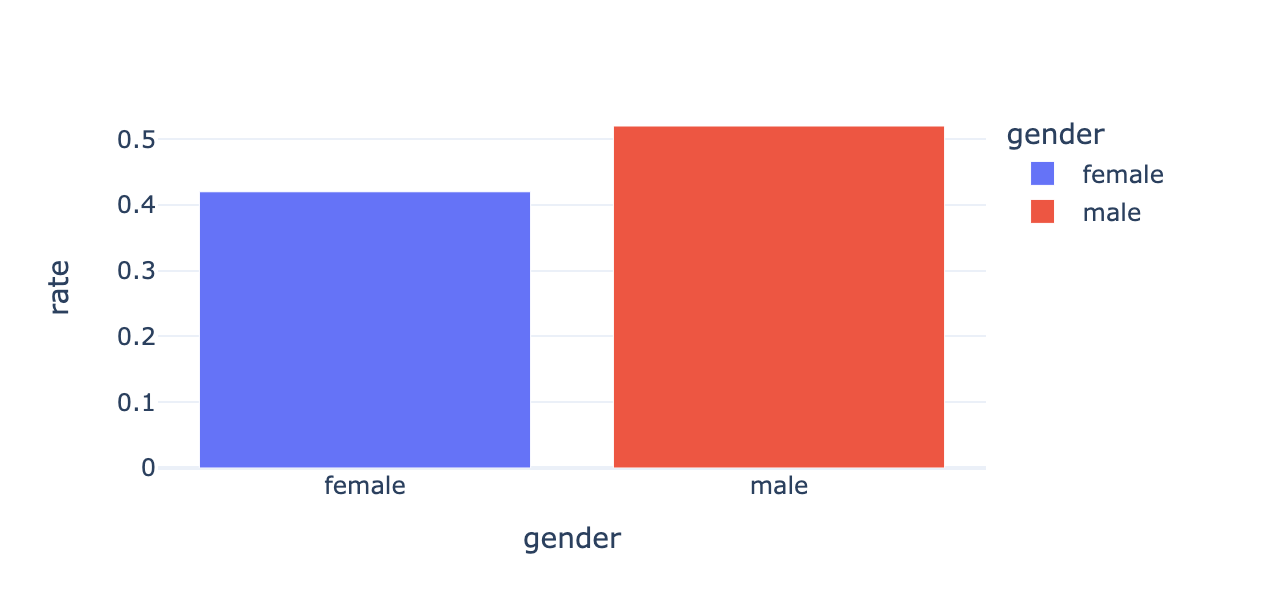

> Note: x,y축의 이름이 수정되었음.